This notebook is primarily for the loading of the model created from model_fit.sh and using the test data on the model, so we can create a confusion matrix for the model to visualize how well the model performs. You can add code to save the confusion matrix, but I just mainly screenshot the confusion matrix instead.

In [13]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix

There are two forms of confusion matrices, one augmented and normalized. We will use both, but feel free to only use one or the other.

In [6]:
def plot_confusion_matrix_augmented(y_true,
                          y_pred,
                          classes,
                          title=None,
                          cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    
    Adapted from:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    Arguments:
        y_true: Real class labels.
        y_pred: Predicted class labels.
        classes: List of class names.
        title: Title for the plot.
        cmap: Colormap to be used.
    
    Returns:
        None.
    """
    if not title:
        title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    plt.show()

In [7]:
def plot_confusion_matrix_normalized(y_true,
                          y_pred,
                          classes,
                          confusion,
                          title=None,
                          cmap=plt.cm.Blues):
    """This function prints and plots the confusion matrix.
    
    Adapted from:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    Arguments:
        y_true: Real class labels.
        y_pred: Predicted class labels.
        classes: List of class names.
        title: Title for the plot.
        cmap: Colormap to be used.
    
    Returns:
        None.
    """
    if not title:
        title = 'Confusion matrix'
    
    
    cm = confusion
    

    fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
    #
    im = ax.imshow( cm.astype(float) , interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], '.2f'),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    plt.show()

Now we want to load in the data we will use to test on the model. Also load in the model.

In [18]:
#test inputs and targets
val_input = np.load('/home/DAVIDSON/iaheung/spirit/Single_Track_Particle_Id/Data/smallDataPreprocessingFiles/2022-03-22 19:19:00.099416val_input_log_scale.npy', allow_pickle=True)
val_target = np.load('/home/DAVIDSON/iaheung/spirit/Single_Track_Particle_Id/Data/smallDataPreprocessingFiles/val_targets.npy', allow_pickle = True)

#we will expand the dimensions of the data so it is in the correct format for the model to read in
val_input = np.expand_dims(val_input, axis=3)
val_input = np.repeat(val_input, 3, axis=3)

#load model
#you will likely need to change the directory based on the folder you are loading the model from
DIRECTORY = '/home/DAVIDSON/iaheung/spirit/Single_Track_Particle_Id/ModelCheckpoints/log-model-checkpoints-329-3layers10-4lr'
model = tf.keras.models.load_model(DIRECTORY)

We will now use the test data on the model:

In [19]:
predictions = model.predict(val_input)
#Predictions is currently a probability distribution, so we take the index from 
#that distribution with the highest probability:
predictions = np.argmax(predictions, axis=1)

Each element of val_target must be of type "numpy.float64", otherwise the confusion matrix code will break. 

In [20]:
val_target = val_target.astype(np.float64)

We now will create the confusion matrices:

In [21]:
normalize='pred'
confusion = confusion_matrix(val_target, predictions, normalize=normalize)

Normalized Confusion Matrix

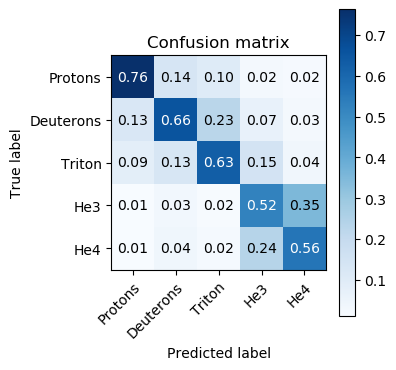

In [22]:
plot_confusion_matrix_normalized(val_target, predictions, ["Protons", "Deuterons", "Triton","He3", "He4"], confusion)

Augmented Confusion Matrix

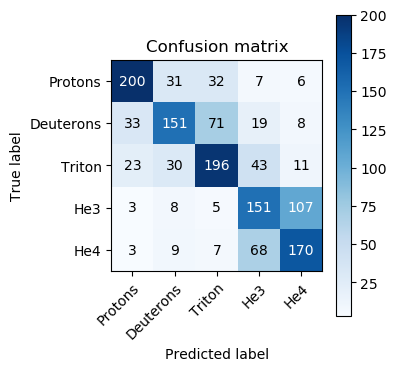

In [23]:
plot_confusion_matrix_augmented(val_target, predictions, ["Protons", "Deuterons", "Triton","He3", "He4"])